# Python Projekt

## Kontext

**Projektmitglieder:** Josephine Görner, Rebecca Ganijneh, Fabian Beerli und Moreno Gallo

**Problemstellung:**
Heutzutage wird es für Unternehmen zunehmend wichtiger, betrügerische Kreditkartentransaktionen frühzeitig zu erkennen, um finanzielle Verluste zu minimieren und das Vertrauen der Kunden zu sichern. Durch die wachsende Anzahl digitaler Transaktionen und die zunehmende Raffinesse der Betrüger stossen herkömmliche, regelbasierte Systeme an ihre Grenzen. Daher gewinnen moderne Ansätze wie Machine Learning an Bedeutung, da sie in der Lage sind, komplexe Muster zu erkennen und sich dynamisch an neue Betrugsmethoden anzupassen.

**Fragestellung:**
1. Wie können Betrugstransaktionen mithilfe von maschinellem Lernen effizient und zuverlässig erkannt werden?​
2. Welche maschinellen Lernalgorithmen liefern die beste Klassifikationsleistung für die vorliegenden Daten?​

**Datenquelle:** Die Daten stammen aus einem öffentlichen Datensatz auf der Plattform Kaggle: [Kaggle - Credit Card Fraud Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data)

**Datenbeschreibung:**
- Der Datensatz enthält Transaktionen, die im September 2013 von europäischen Kreditkarteninhabern durchgeführt wurden.
- Dieser Datensatz enthält Transaktionen, die innerhalb von zwei Tagen getätigt wurden. Er umfasst 284'807 Transaktionen, darunter 492 Betrugsfälle (ca. 0,172 %).
- Alle Eingabevariablen (V1 bis V28) sind numerisch und wurden mittels PCA (Principal Component Analysis) transformiert.
- Aus Gründen der Vertraulichkeit wurden die ursprünglichen Merkmale und Hintergrundinformationen nicht bereitgestellt.
- Die Variablen „Zeit“ (Sekunden seit der ersten Transaktion) und „Betrag“ (Transaktionshöhe) wurden nicht PCA-transformiert.
- Die Zielvariable „Klasse“ (später "Fraud") ist binär: 1 für Betrug und 0 für keine betrügerische Transaktion.

**Zielsetzung:**
Ziel ist es, mehrere Machine-Learning-Modelle zu entwickeln und basierend auf einem Vergleich das beste Modell auszuwählen. Die Modelle sollen auf bisherigen Transaktionsdaten trainiert werden, um Abweichungen zu erkennen, wie beispielsweise ungewöhnlich hohe Zahlungen. Jedes Modell wird darauf ausgelegt, solche untypischen Muster zu lernen und betrügerische Aktivitäten präzise vorherzusagen.

**Methodik & Vorgehen:**
Wir haben die Themen dieses Projektes unter den Mittgliedern aufgeteilt. Zunächst erfolgt eine explorative Datenanalyse (EDA), um die Daten besser zu verstehen. Anschliessend wurden die Punkte Unfiying & Transformation, Data Cleansing und Analysis & Validation sowie Feature Selection & Engineering angewendet. Nach jedem Abschnitt wurden die wichtigsten Erkenntnisse (Key Findings) dokumentiert.
Es wurden vier Machine-Learning-Algorithmen, unteranderem Decision Tree, Logistic Regression, Random Forest und XGBOOST, trainiert und evaluiert. Da das Datenset sehr unausgeglichen ist, wurde für die Datenaufteilung SMOTE verwendet. Ergänzend wurde auch eine benutzerfreundliche Webseite entwickelt, die es ermöglicht, die Ergebnisse der Modellen übersichtlich zu vergleichen. Schliesslich wird das beste Modell mit Explainable AI interpretiert.

Als Quelle wurden die bereitgestellten Colabs verwendet (sofern nicht anders angegeben). Dabei wurden keine Inhalte eins zu eins übernommen, sondern lediglich relevante Ansätze und Code-Snippets genutzt, die spezifisch für den Datensatz und unser Projekt sinnvoll waren. Im Jupyter Notebook wurden Markdown-Abschnitte eingefügt, um die Struktur und Lesbarkeit zu verbessern. Diese Abschnitte dienen dazu, die einzelnen Schritte des Projekts klar zu gliedern und repräsentieren die entsprechenden Inhalte der bereitgestellten Colabs.


Es wurden Python-Bibliotheken wie Pandas, Scikit-Learn, Matplotlib, Seaborn, Dowhy, NumPy, Imbalanced-Learn im Projekt verwendet.


**Herausforderungen**:
Es gab mehrere Herausforderungen im Projekt. Einerseits war das Datensets sehr unausgeglichen, diese Herausforderungen konnten wir aber mithilfe SMOTE lösen. Die Wahl der Modelle war ebenfalls nicht immer einfach, dies konnte aber in Gruppendiskussionen gelöst werden.

**Kurzanleitung für das Starten der Webseite**:
1. Führe train_models.py aus, um die Modelle zu erstellen
2. Wechsle in den Ordner backend und starte den Server mit python app.py



## Explorative Datenanalyse (EDA)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV-Datei wird in ein DataFrame geladen
df = pd.read_csv('creditcard.csv')

# Ersten fünf Zeilen des DataFrames anzeigen
df.head()


,Unnamed: 0.1,Unnamed: 0,Index,Time,V1,V2,V3,V4,V5,V6,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,0,0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

# Dann den Dateipfad angeben
#import pandas as pd
#df = pd.read_csv('card_transdata.csv')

In [4]:
# Datentyp des Objektes df zurückgeben
type(df)

pandas.core.frame.DataFrame

In [5]:
# Anzahl Zeilen und Spalten zurückgeben
df.shape

(283726, 34)

In [6]:
# Alle Spalten anzeigen lassen
pd.set_option("display.max.columns", None)

# Ausgabe aller Spalten mit den letzten fünf Zeilen
df.tail()

,Unnamed: 0.1,Unnamed: 0,Index,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
283721,283721,283721,283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
283722,283722,283722,283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
283723,283723,283723,283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
283724,283724,283724,283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
283725,283725,283725,283725,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
# Spalte und ihre Datentypen anzeigen
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 34 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0.1  283726 non-null  int64  
 1   Unnamed: 0    283726 non-null  int64  
 2   Index         283726 non-null  int64  
 3   Time          283726 non-null  float64
 4   V1            283726 non-null  float64
 5   V2            283726 non-null  float64
 6   V3            283726 non-null  float64
 7   V4            283726 non-null  float64
 8   V5            283726 non-null  float64
 9   V6            283726 non-null  float64
 10  V7            283726 non-null  float64
 11  V8            283726 non-null  float64
 12  V9            283726 non-null  float64
 13  V10           283726 non-null  float64
 14  V11           283726 non-null  float64
 15  V12           283726 non-null  float64
 16  V13           283726 non-null  float64
 17  V14           283726 non-null  float64
 18  V15 

In [8]:
# Indexinfos anzeigen
df.index

RangeIndex(start=0, stop=283726, step=1)

In [9]:
# Ein Element anzeigen
df.loc[280]

,280
Unnamed: 0.1,280.000000
Unnamed: 0,280.000000
Index,280.000000
Time,206.000000
V1,-1.499761
V2,1.059588
V3,0.496912
V4,1.006069
V5,-0.672949
V6,-0.490299


In [10]:
# Max der einzelnen Spalten
df.max()



,0
Unnamed: 0.1,283725.000000
Unnamed: 0,283725.000000
Index,283725.000000
Time,172792.000000
V1,2.454930
V2,22.057729
V3,9.382558
V4,16.875344
V5,34.801666
V6,73.301626


In [11]:
# Min der einzelnen Spalten
df.min()

,0
Unnamed: 0.1,0.000000
Unnamed: 0,0.000000
Index,0.000000
Time,0.000000
V1,-56.407510
V2,-72.715728
V3,-48.325589
V4,-5.683171
V5,-113.743307
V6,-26.160506


In [12]:
# Summe der einzelnen Spalten
df.sum()

,0
Unnamed: 0.1,4.025008e+10
Unnamed: 0,4.025008e+10
Index,4.025008e+10
Time,2.690037e+10
V1,1.678849e+03
V2,-1.173138e+03
V3,4.576839e+02
V4,-8.416186e+02
V5,5.185263e+02
V6,-3.233024e+02


In [13]:
# Überprüfen von NaN Werte
print(df.isnull().any())


Unnamed: 0.1    False
Unnamed: 0      False
Index           False
Time            False
V1              False
V2              False
V3              False
V4              False
V5              False
V6              False
V7              False
V8              False
V9              False
V10             False
V11             False
V12             False
V13             False
V14             False
V15             False
V16             False
V17             False
V18             False
V19             False
V20             False
V21             False
V22             False
V23             False
V24             False
V25             False
V26             False
V27             False
V28             False
Amount          False
Fraud           False
dtype: bool


In [14]:
# NaN Werte zählen
print(df.isnull().sum().to_string())

Unnamed: 0.1    0
Unnamed: 0      0
Index           0
Time            0
V1              0
V2              0
V3              0
V4              0
V5              0
V6              0
V7              0
V8              0
V9              0
V10             0
V11             0
V12             0
V13             0
V14             0
V15             0
V16             0
V17             0
V18             0
V19             0
V20             0
V21             0
V22             0
V23             0
V24             0
V25             0
V26             0
V27             0
V28             0
Amount          0
Fraud           0


In [15]:
# Alle Spalten finden, in denen alle Daten vorhanden sind
complete_columns = list(df.columns)
print(complete_columns)

['Unnamed: 0.1', 'Unnamed: 0', 'Index', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Fraud']


In [16]:
# Einzigartige Werte angeben
df.nunique()

,0
Unnamed: 0.1,283726
Unnamed: 0,283726
Index,283726
Time,124592
V1,275663
V2,275663
V3,275663
V4,275663
V5,275663
V6,275663


In [17]:
# Anzahl doppelte Zeilen prüfen und entfernen
print(f"Anzahl doppelter Zeilen: {df.duplicated().sum()}")
df = df.drop_duplicates()


Anzahl doppelter Zeilen: 0


In [18]:
# Spalte Class in Fraud umbenennen. Diese Spalte zeigt auf, ob es sich um Betrug handelt oder nicht. Diese Zeile zeigt die ungleiche Verteilung von Betrug und Nichtbetrug auf.
df.rename(columns={'Class': 'Fraud'}, inplace=True)
df['Fraud'].value_counts()


,count
Fraud,
0,283253
1,473


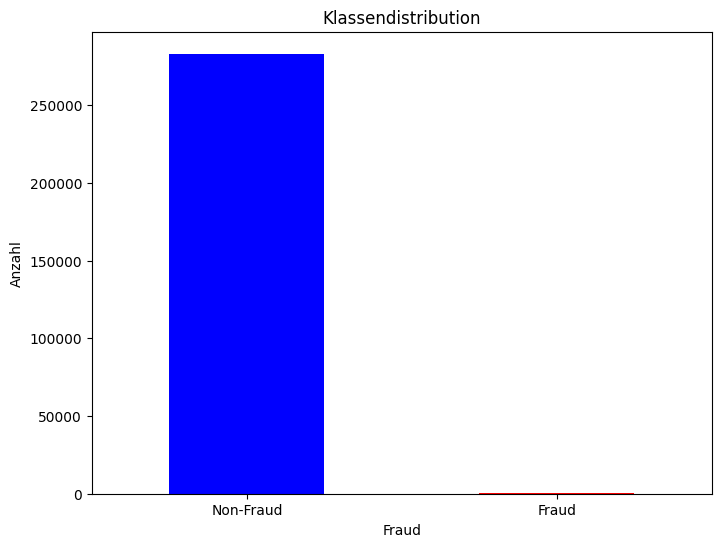

In [19]:
# Klassendistribution aufzeigen
class_counts = df['Fraud'].value_counts()
class_labels = ['Non-Fraud', 'Fraud']
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['blue', 'red'])

plt.title('Klassendistribution')
plt.xticks(ticks=[0, 1], labels=class_labels, rotation=0)
plt.ylabel('Anzahl')
plt.show()

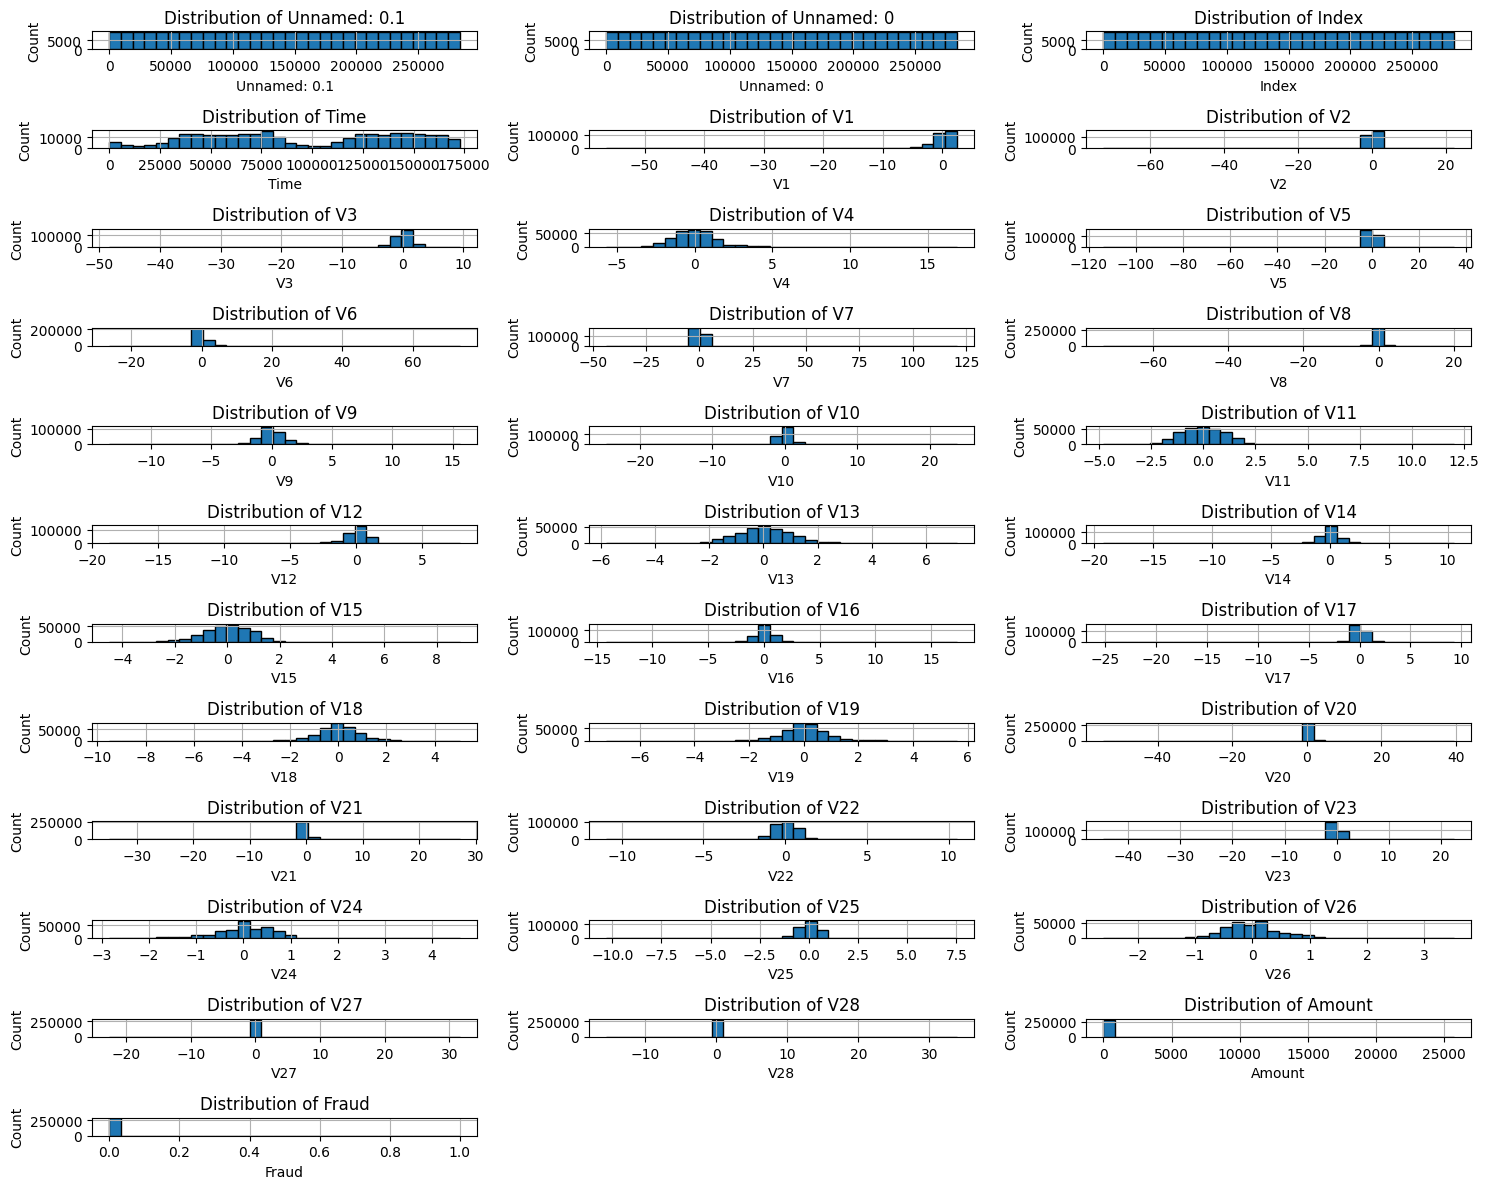

In [20]:
# Histogramme für jede numerische Spalte im DataFrame
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot((len(numerical_features) + 2) // 3, 3, i)  # Automatische Anordnung der Plots
    df[feature].hist(bins=30, edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [21]:
# Basic Statistik aufzeigen
df.describe().round(4)


,Unnamed: 0.1,Unnamed: 0,Index,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
count,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000,283726.0000
mean,141862.5000,141862.5000,141862.5000,94811.0776,0.0059,-0.0041,0.0016,-0.0030,0.0018,-0.0011,0.0018,-0.0009,-0.0016,-0.0014,0.0002,-0.0007,0.0006,0.0003,0.0010,0.0012,0.0002,0.0015,-0.0003,0.0002,-0.0004,-0.0000,0.0002,0.0002,-0.0002,0.0001,0.0018,0.0005,88.4727,0.0017
std,81904.7856,81904.7856,81904.7856,47481.0479,1.9480,1.6467,1.5087,1.4142,1.3770,1.3319,1.2277,1.1791,1.0955,1.0764,1.0187,0.9947,0.9954,0.9522,0.9149,0.8737,0.8425,0.8374,0.8134,0.7700,0.7239,0.7246,0.6237,0.6056,0.5212,0.4821,0.3957,0.3280,250.3994,0.0408
min,0.0000,0.0000,0.0000,0.0000,-56.4075,-72.7157,-48.3256,-5.6832,-113.7433,-26.1605,-43.5572,-73.2167,-13.4341,-24.5883,-4.7975,-18.6837,-5.7919,-19.2143,-4.4989,-14.1299,-25.1628,-9.4987,-7.2135,-54.4977,-34.8304,-10.9331,-44.8077,-2.8366,-10.2954,-2.6046,-22.5657,-15.4301,0.0000,0.0000
25%,70931.2500,70931.2500,70931.2500,54204.7500,-0.9160,-0.6003,-0.8897,-0.8501,-0.6898,-0.7690,-0.5525,-0.2088,-0.6442,-0.5356,-0.7616,-0.4062,-0.6479,-0.4257,-0.5815,-0.4669,-0.4839,-0.4980,-0.4563,-0.2115,-0.2283,-0.5427,-0.1617,-0.3545,-0.3175,-0.3268,-0.0706,-0.0528,5.6000,0.0000
50%,141862.5000,141862.5000,141862.5000,84692.5000,0.0204,0.0639,0.1800,-0.0222,-0.0535,-0.2752,0.0409,0.0219,-0.0526,-0.0932,-0.0323,0.1391,-0.0129,0.0502,0.0493,0.0671,-0.0659,-0.0021,0.0034,-0.0624,-0.0294,0.0067,-0.0112,0.0410,0.0163,-0.0522,0.0015,0.0113,22.0000,0.0000
75%,212793.7500,212793.7500,212793.7500,139298.0000,1.3161,0.8003,1.0270,0.7396,0.6122,0.3968,0.5705,0.3257,0.5960,0.4536,0.7396,0.6170,0.6632,0.4923,0.6501,0.5235,0.3990,0.5020,0.4585,0.1332,0.1862,0.5282,0.1477,0.4397,0.3507,0.2403,0.0912,0.0783,77.5100,0.0000
max,283725.0000,283725.0000,283725.0000,172792.0000,2.4549,22.0577,9.3826,16.8753,34.8017,73.3016,120.5895,20.0072,15.5950,23.7451,12.0189,7.8484,7.1269,10.5268,8.8777,17.3151,9.2535,5.0411,5.5920,39.4209,27.2028,10.5031,22.5284,4.5845,7.5196,3.5173,31.6122,33.8478,25691.1600,1.0000


In [22]:
# Abspeicherung der Änderung
df.to_csv('creditcard.csv', index=True)

### Key Findings:
- Der Datensatz enthält keine fehlenden Werte und falls es vorhanden hat, werden diese entfernt.
- Doppelte Zeilen wurden identifiziert und entfernt.
- Nach der Bereinigung reicht der Index von 0 bis 283'726.
- Die Datentypen setzen sich aus 30 float64-Spalten und zwei int64-Spalte zusammen.
- Die Spalte Fraud zeigt eine unausgeglichene Verteilung, wobei deutlich mehr Datenpunkte ohne Betrug (283'258) als solche mit Betrug (473) vorhanden sind.
- In einigen Spalten gibt es Werte im negativen Bereich. Da die Spaltennamen keine genauen Informationen über die Bedeutung der Daten liefern, bleibt unklar, warum diese Werte negativ sind.

## Unifying & Transformation

Hinweis: Die Spalte Time wird nicht in ein Datetime-Format umgewandelt, da sie die Anzahl der Sekunden beschreibt, die zwischen der aktuellen Transaktion und der ersten Transaktion im Datensatz vergangen sind. Eine Umwandlung bietet in diesem Fall keinen erkennbaren Vorteil für die Analyse oder Modellierung.

In [23]:
# Anzeige Datentyp für Spalte Time (Siehe Hinweis oben)
print(df['Time'].dtype)


float64


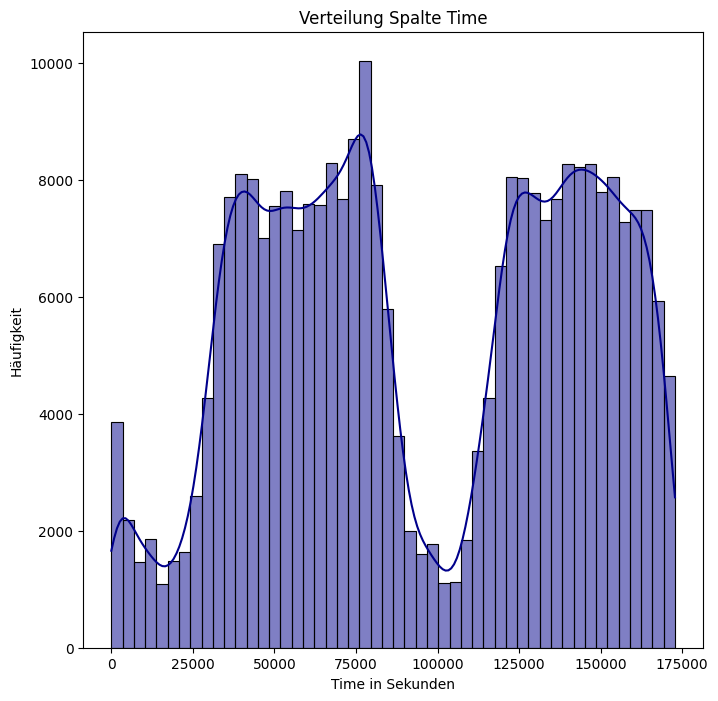

50'000s -> 13.9h
75'000 Sekunden -> 20.8h
100'000 Sekunden -> 27.8h
125'000 Sekunden -> 34.7h
150'000 Sekunden -> 41.7h
175'000 Sekunden -> 48.6h


In [24]:
# Time wird genauer angeschaut: Hier die Verteilung der Spalte Time
plt.figure(figsize=(8, 8))
sns.histplot(df['Time'], bins=50, kde=True, color='darkblue')
plt.title('Verteilung Spalte Time')
plt.xlabel('Time in Sekunden')
plt.ylabel('Häufigkeit')
plt.show()

print("50'000s -> 13.9h")
print("75'000 Sekunden -> 20.8h")
print("100'000 Sekunden -> 27.8h")
print("125'000 Sekunden -> 34.7h")
print("150'000 Sekunden -> 41.7h")
print("175'000 Sekunden -> 48.6h")

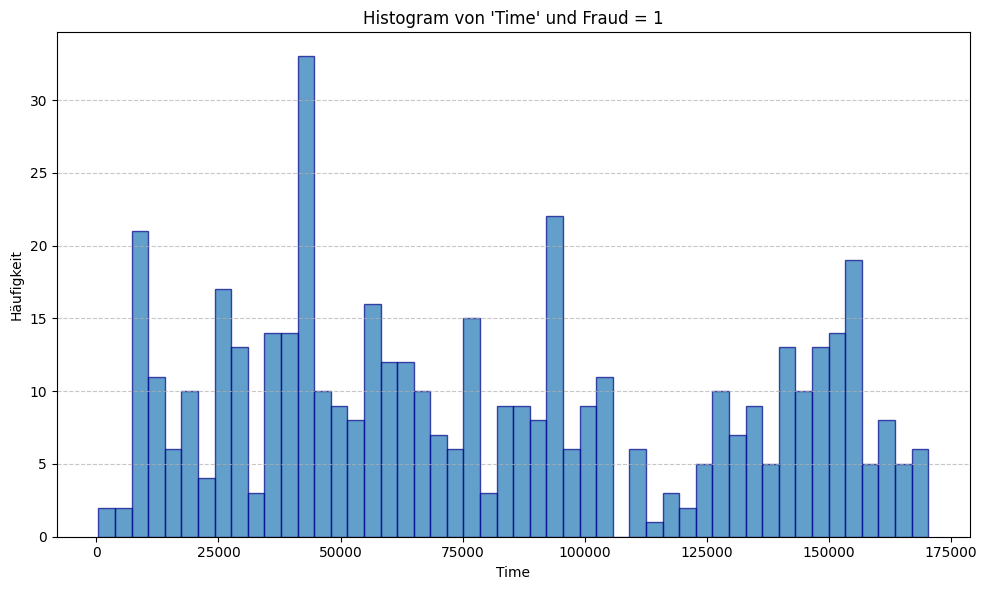

In [25]:
# Alle Zeilen der Spalte 'Time' anzeigen, die 'Fraud' = 1 haben
fraud_time = df[df['Fraud'] == 1]['Time']

# Histogramm anzeigen (Visualisierung)
plt.figure(figsize=(10, 6))
plt.hist(fraud_time, bins=50, edgecolor='darkblue', alpha=0.7)
plt.title("Histogram von 'Time' und Fraud = 1")
plt.xlabel("Time")
plt.ylabel("Häufigkeit")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [26]:
# Verwendung von .itertuples() zur Iteration über Zeilen als benannte Tupel
print("\nIteration mit .itertuples() (Begrenzte Vorschau):")
for row in df[['Time', 'V5', 'V15', 'V28']].itertuples():
    print(row)
    if row.Index >= 4:  # Nach 5 Zeilen abbrechen (Index 0 bis 4)
        break


Iteration mit .itertuples() (Begrenzte Vorschau):
Pandas(Index=0, Time=0.0, V5=-0.338320769942518, V15=1.46817697209427, V28=-0.0210530534538215)
Pandas(Index=1, Time=0.0, V5=0.0600176492822243, V15=0.635558093258208, V28=0.0147241691924927)
Pandas(Index=2, Time=1.0, V5=-0.503198133318193, V15=2.34586494901581, V28=-0.0597518405929204)
Pandas(Index=3, Time=1.0, V5=-0.0103088796030823, V15=-0.631418117709045, V28=0.0614576285006353)
Pandas(Index=4, Time=2.0, V5=-0.407193377311653, V15=0.175121130008994, V28=0.215153147499206)


In [27]:
# Erstellen von Listen aus spezifischen Daten im DataFrame
# Beispiel: Extrahieren der Werte für 'Time' und 'V5' in separaten Listen
if 'Time' in df.columns and 'V5' in df.columns:
    distance_values = df['Time'].tolist()
    fraud_labels = df['V5'].tolist()
    print("\nBeispiel-Distanzwerte:", distance_values[:5])
    print("Beispiel-Betrugsklassifikationen:", fraud_labels[:5])



Beispiel-Distanzwerte: [0.0, 0.0, 1.0, 1.0, 2.0]
Beispiel-Betrugsklassifikationen: [-0.338320769942518, 0.0600176492822243, -0.503198133318193, -0.0103088796030823, -0.407193377311653]


In [28]:
# Iteration über DataFrame-Spalten und -Zeilen

# Spalten iterieren und ausgeben
print("\nIteration über die Spalten:")
for col_label, col in df.items():
    print(f"Spalte: {col_label}")
    print(f"Daten:\n{col.head()}")
    print('-' * 40)

# Zeilen iterieren und ausgeben (nur die ersten 5 Zeilen zur Übersicht)
print("\nIteration über die ersten 5 Zeilen:")
for row_label, row in df.head(5).iterrows():
    print(f"Zeile: {row_label}")
    print(f"Daten:\n{row}")
    print('-' * 40)


Iteration über die Spalten:
Spalte: Unnamed: 0.1
Daten:
0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0.1, dtype: int64
----------------------------------------
Spalte: Unnamed: 0
Daten:
0    0
1    1
2    2
3    3
4    4
Name: Unnamed: 0, dtype: int64
----------------------------------------
Spalte: Index
Daten:
0    0
1    1
2    2
3    3
4    4
Name: Index, dtype: int64
----------------------------------------
Spalte: Time
Daten:
0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
Name: Time, dtype: float64
----------------------------------------
Spalte: V1
Daten:
0   -1.359807
1    1.191857
2   -1.358354
3   -0.966272
4   -1.158233
Name: V1, dtype: float64
----------------------------------------
Spalte: V2
Daten:
0   -0.072781
1    0.266151
2   -1.340163
3   -0.185226
4    0.877737
Name: V2, dtype: float64
----------------------------------------
Spalte: V3
Daten:
0    2.536347
1    0.166480
2    1.773209
3    1.792993
4    1.548718
Name: V3, dtype: float64
------------------------

## Key findings:
- Spalte Time wurde genauer angeschaut. Die Verteilung zeigt zwei klare Spitzen, was auf eine periodische Aktivität hindeutet. Das kann auf eine zeitliche Regelmässigkeit zwischen den Transaktionen hindeutet bsp. Regelmässiges Einkaufen am Dienstag Abend.
- Punkte, die bereits im Rahmen der Explorativen Datenanalyse (EDA) durchgeführt wurden, wurden in späteren Schritten nicht erneut ausgeführt, um Redundanzen zu vermeiden.
- Die Daten wurden nicht zusammengeführt, da der vorliegende Datensatz bereits vollständig und konsistent ist und es keinen Anlass gab, weitere Datenquellen zu integrieren oder zusätzliche Daten zusammenzuführen.

## Data Cleansing

In [29]:
# Spalte Index hinzufügen. Es wird also nicht die automatisch generierte Indexspalte verwendet
df['Index'] = range(len(df))
df.set_index('Index', inplace=True)

In [30]:
# Überprüfen, ob es geklappt hat
print(df.head())
df.index
df.loc[2800]

       Unnamed: 0.1  Unnamed: 0  Time        V1        V2        V3        V4  \
Index                                                                           
0                 0           0   0.0 -1.359807 -0.072781  2.536347  1.378155   
1                 1           1   0.0  1.191857  0.266151  0.166480  0.448154   
2                 2           2   1.0 -1.358354 -1.340163  1.773209  0.379780   
3                 3           3   1.0 -0.966272 -0.185226  1.792993 -0.863291   
4                 4           4   2.0 -1.158233  0.877737  1.548718  0.403034   

             V5        V6        V7        V8        V9       V10       V11  \
Index                                                                         
0     -0.338321  0.462388  0.239599  0.098698  0.363787  0.090794 -0.551600   
1      0.060018 -0.082361 -0.078803  0.085102 -0.255425 -0.166974  1.612727   
2     -0.503198  1.800499  0.791461  0.247676 -1.514654  0.207643  0.624501   
3     -0.010309  1.247203  0.237609  

,2800
Unnamed: 0.1,2800.000000
Unnamed: 0,2800.000000
Time,2399.000000
V1,-0.569365
V2,1.240862
V3,1.170854
V4,0.016219
V5,-0.096222
V6,-1.017994
V7,0.652285


In [31]:
# Abspeicherung der Änderung
df.to_csv('creditcard.csv', index=True)

## Key Findings:
- Viele Schritte wie Spaltenumbenennung oder Beurteilung der Datenqualität wurden bereits in Schritt EDA gemacht.

## Analysis & Validation und Feature Selection & Engineering

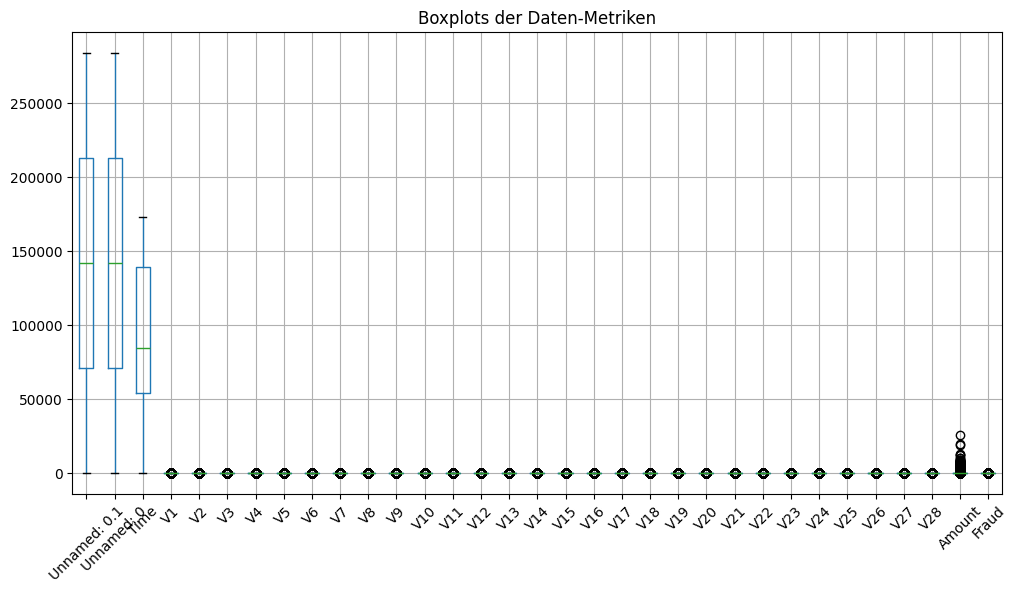

In [32]:
# Erstellung von Boxplots zur Überprüfung von Ausreissern
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
df.select_dtypes(include=['float64', 'int64']).boxplot()
plt.xticks(rotation=45)
plt.title('Boxplots der Daten-Metriken')
plt.show()

Anzahl der Ausreisser: 31685
count    31685.000000
mean       512.929099
std        586.838556
min        185.380000
25%        240.000000
50%        335.430000
75%        552.100000
max      25691.160000
Name: Amount, dtype: float64


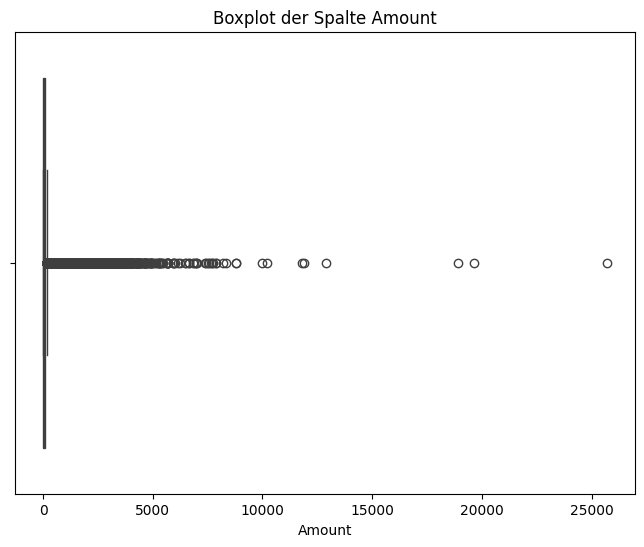

Fraud
0    31598
1       87
Name: Amount, dtype: int64


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Berechnung von Q1, Q3 und IQR
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Festlegen der Grenzen für normale Werte
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifikation der Ausreisser
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]

# Ausgabe von Ausreissern
print("Anzahl der Ausreisser:", outliers.shape[0])
print(outliers['Amount'].describe())

# Visualisierung
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Amount')
plt.title('Boxplot der Spalte Amount')
plt.show()

# Vergleich Outliers in Amount zu Fraud
print(outliers.groupby('Fraud')['Amount'].count())

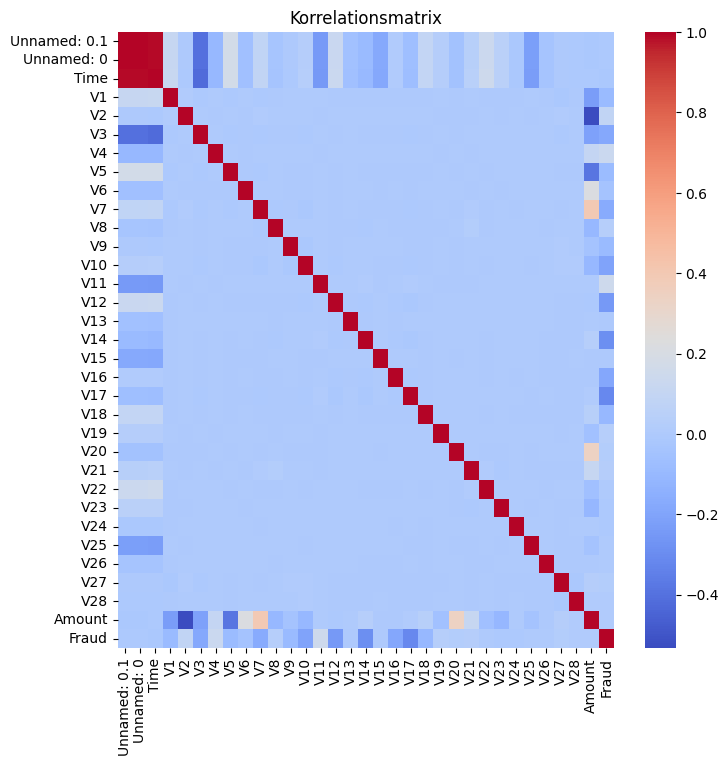

In [34]:
# Korrelationsmatrix erstellen

plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Korrelationsmatrix')
plt.show()



In [35]:
# Die drei Typen der Korrelation anwenden
from scipy import stats

# Funktion für die Berechnung der Korrelationen
def print_correlations(x, y, title):
    pearson_r, _ = stats.pearsonr(x, y)
    spearman_rho, _ = stats.spearmanr(x, y)
    kendall_tau, _ = stats.kendalltau(x, y)

    print(f"Korrelation für: {title}:")
    print(f"Pearson (r)   = {pearson_r:.3f}")
    print(f"Spearman (ρ)  = {spearman_rho:.3f}")
    print(f"Kendall (τ)   = {kendall_tau:.3f}")

# Zielvariable definieren
target = 'Fraud'

# Nur nummerische Spalten auswählen
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Berechnen Korrelation zwischen Fraud und allen anderen nummerischen Spalten
for col in numeric_columns:
    if col != target:  # Zielvariable nicht mit sich selbst vergleichen
        print_correlations(df[target], df[col], f"{target} vs {col}")



Korrelation für: Fraud vs Unnamed: 0.1:
Pearson (r)   = -0.012
Spearman (ρ)  = -0.012
Kendall (τ)   = -0.010
Korrelation für: Fraud vs Unnamed: 0:
Pearson (r)   = -0.012
Spearman (ρ)  = -0.012
Kendall (τ)   = -0.010
Korrelation für: Fraud vs Time:
Pearson (r)   = -0.012
Spearman (ρ)  = -0.012
Kendall (τ)   = -0.010
Korrelation für: Fraud vs V1:
Pearson (r)   = -0.094
Spearman (ρ)  = -0.041
Kendall (τ)   = -0.033
Korrelation für: Fraud vs V2:
Pearson (r)   = 0.085
Spearman (ρ)  = 0.049
Kendall (τ)   = 0.040
Korrelation für: Fraud vs V3:
Pearson (r)   = -0.182
Spearman (ρ)  = -0.058
Kendall (τ)   = -0.047
Korrelation für: Fraud vs V4:
Pearson (r)   = 0.129
Spearman (ρ)  = 0.062
Kendall (τ)   = 0.050
Korrelation für: Fraud vs V5:
Pearson (r)   = -0.088
Spearman (ρ)  = -0.028
Kendall (τ)   = -0.023
Korrelation für: Fraud vs V6:
Pearson (r)   = -0.044
Spearman (ρ)  = -0.038
Kendall (τ)   = -0.031
Korrelation für: Fraud vs V7:
Pearson (r)   = -0.172
Spearman (ρ)  = -0.047
Kendall (τ)   = -0.

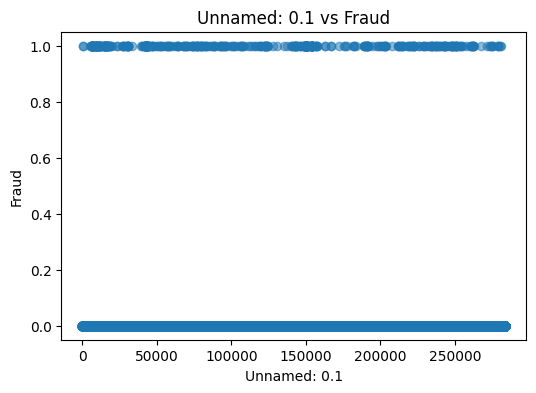

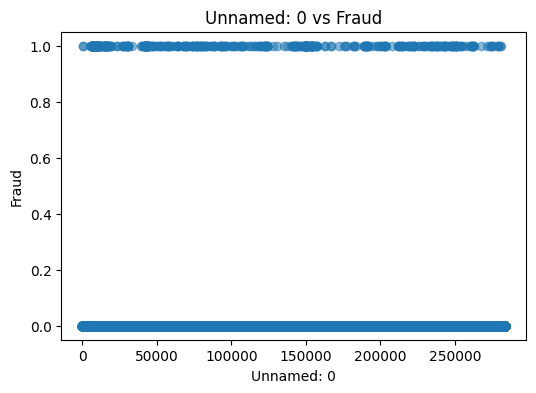

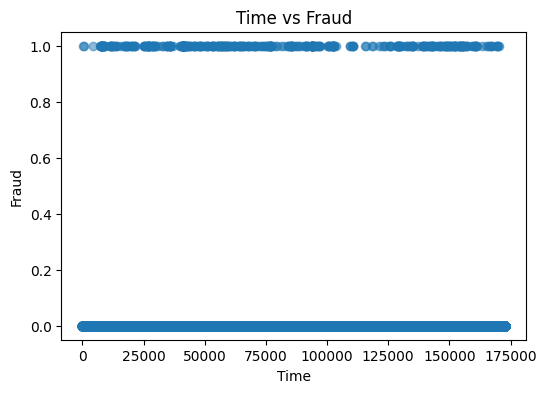

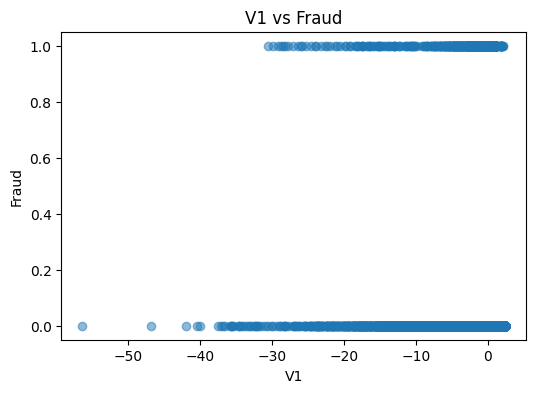

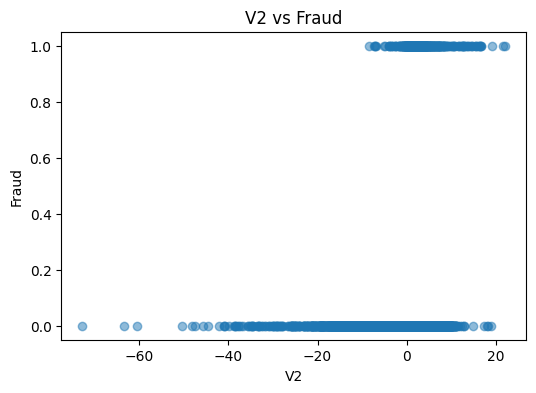

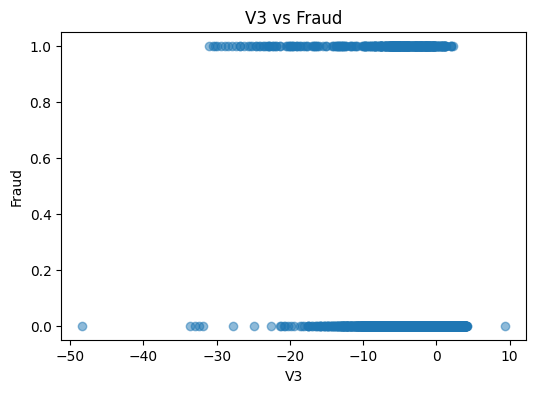

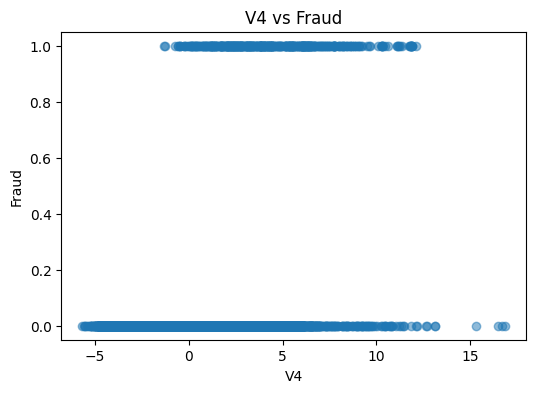

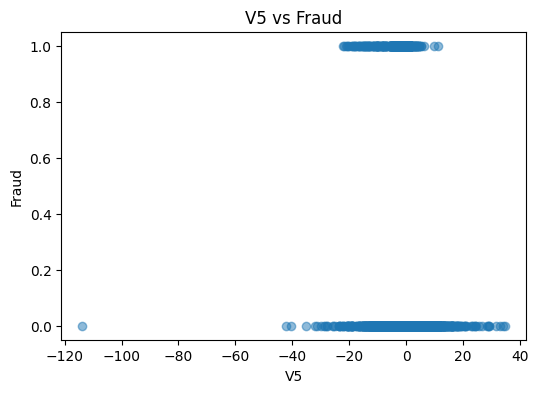

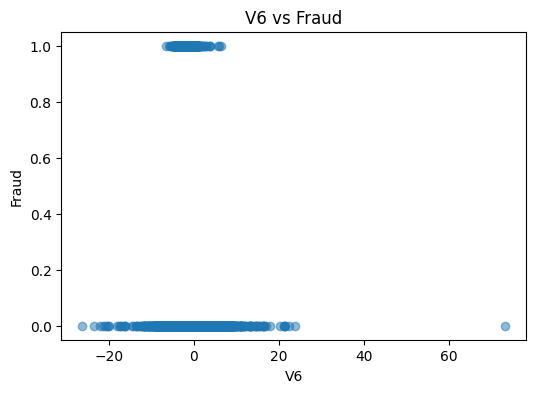

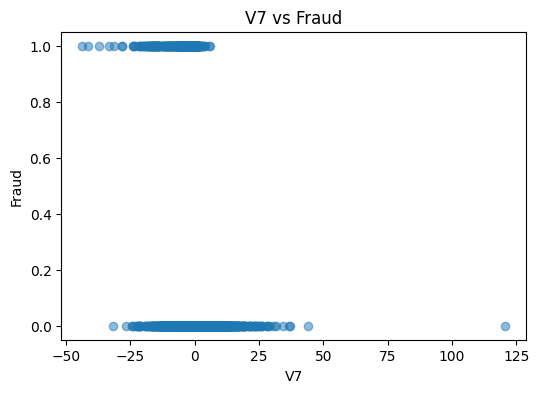

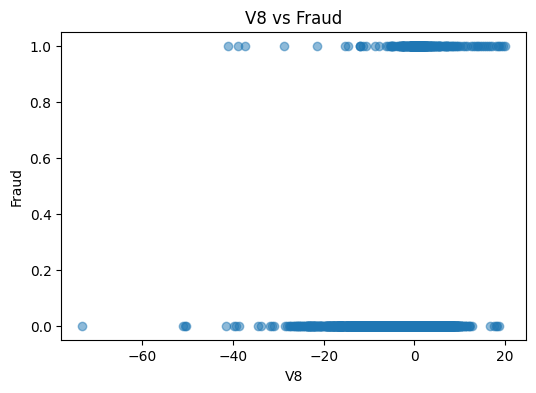

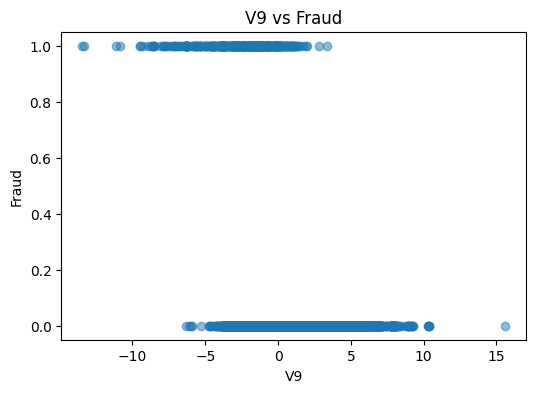

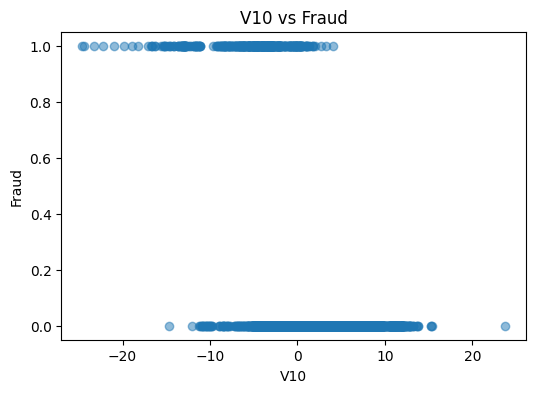

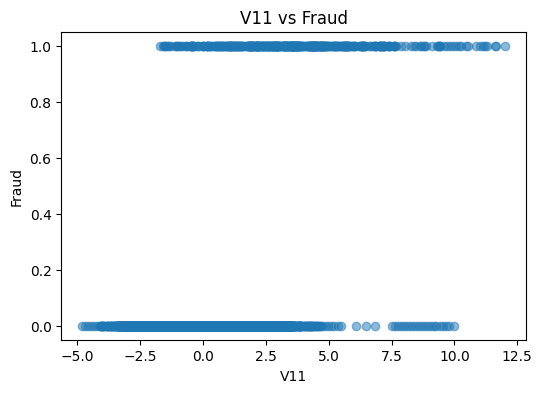

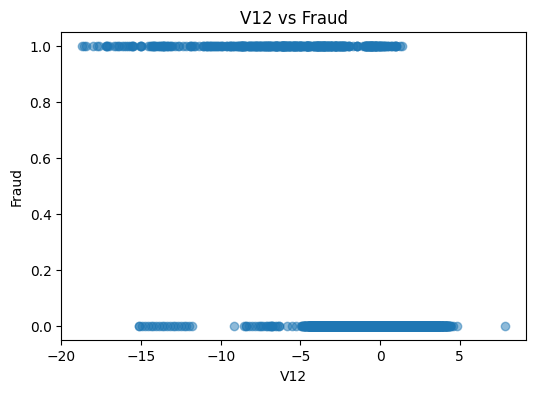

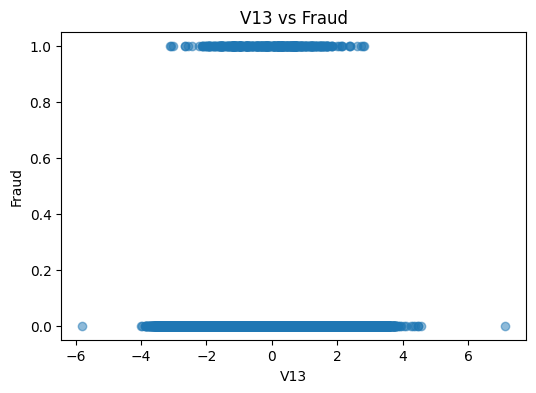

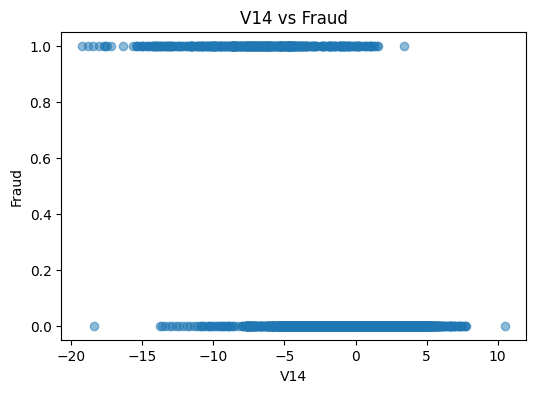

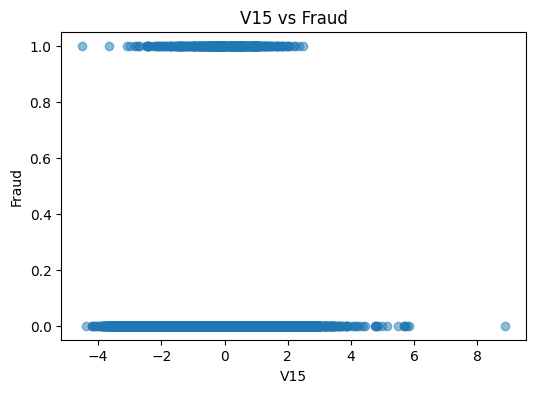

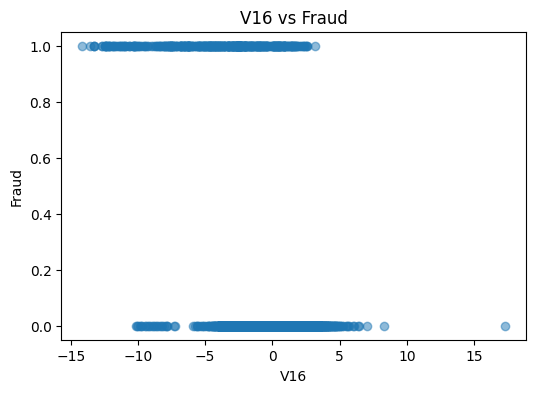

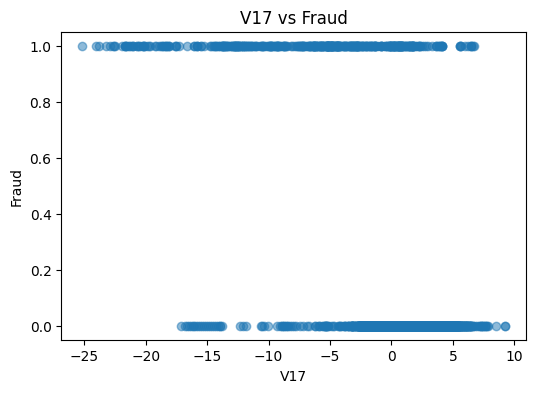

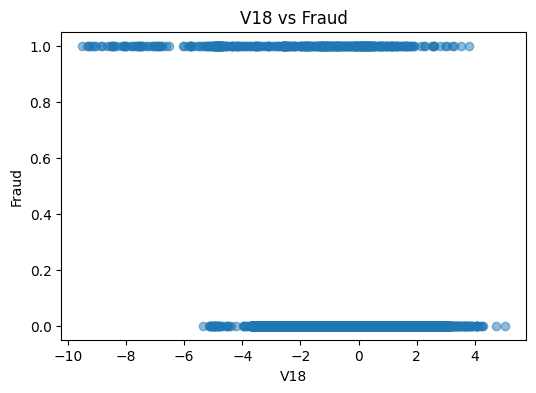

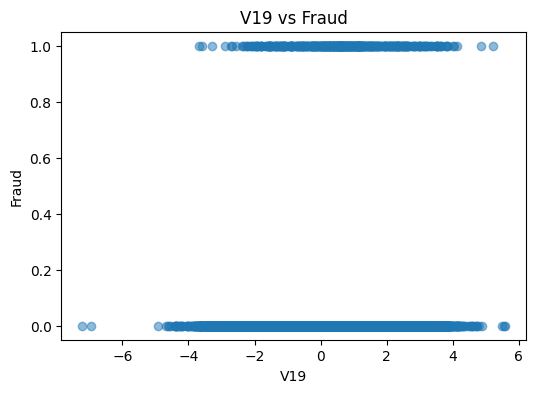

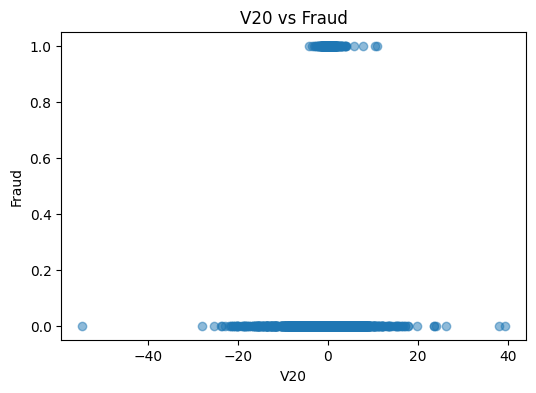

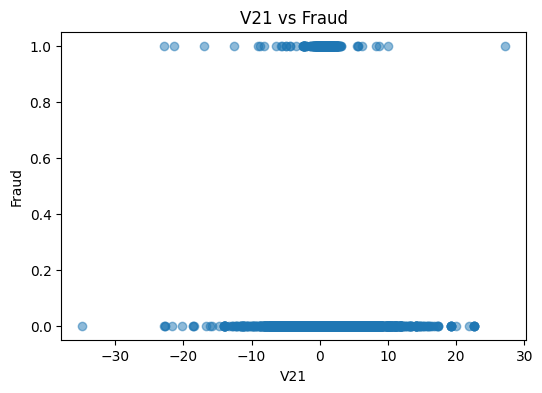

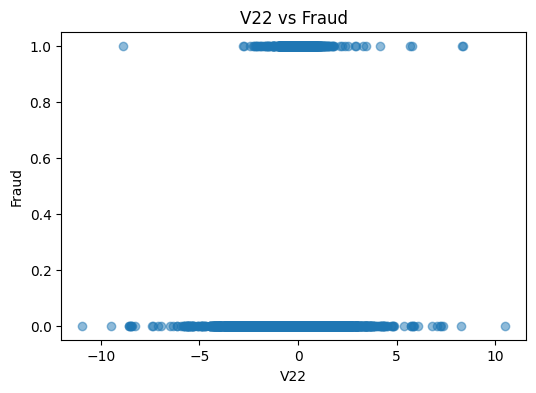

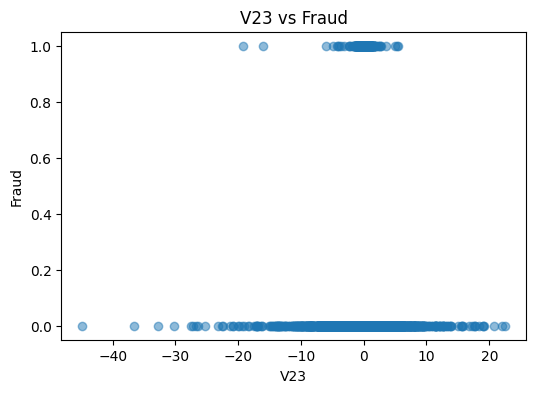

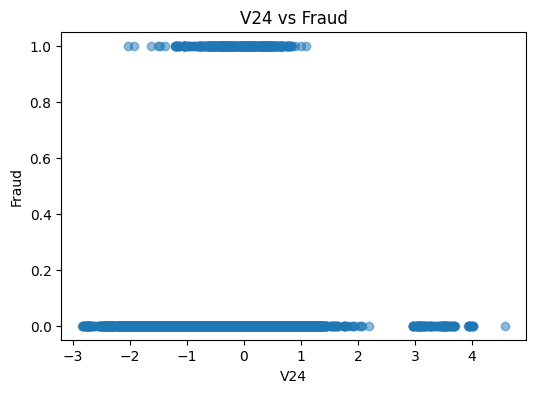

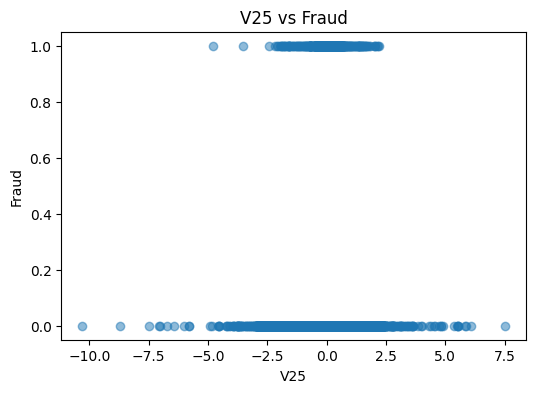

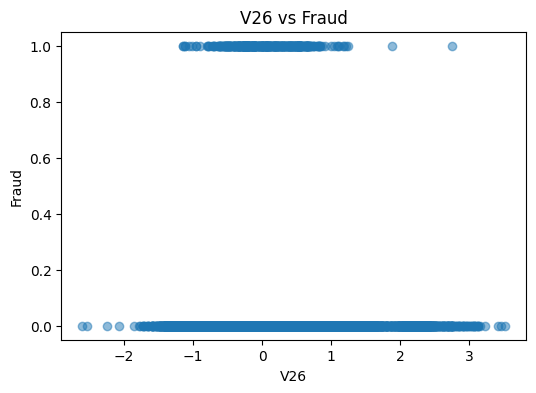

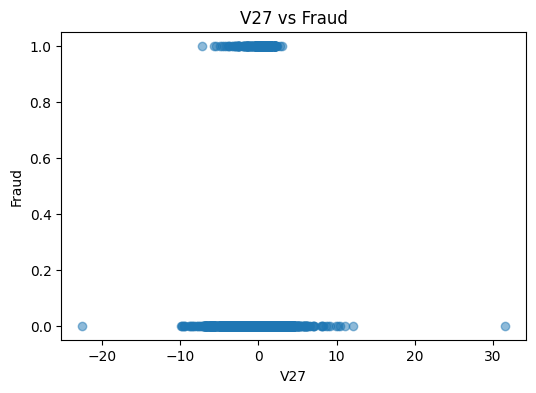

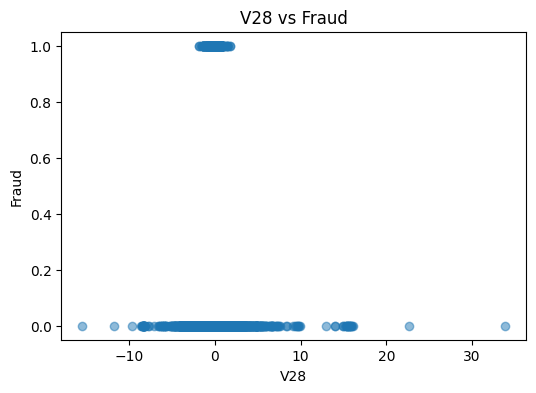

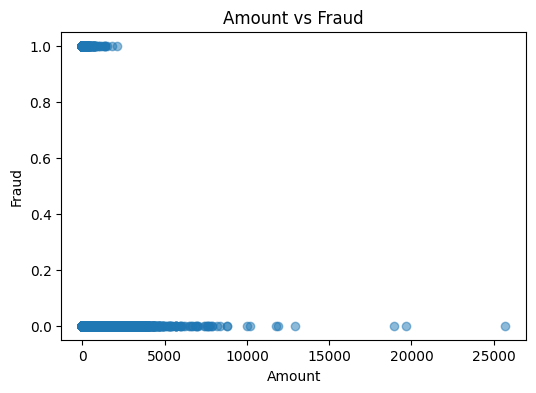

In [36]:
# Bestimmung Linerae Beziehung zwischen Fraud und andere Variablen
import matplotlib.pyplot as plt

for column in df.columns:
    if column != 'Fraud':
        plt.figure(figsize=(6, 4))
        plt.scatter(df[column], df['Fraud'], alpha=0.5)
        plt.title(f'{column} vs Fraud')
        plt.xlabel(column)
        plt.ylabel('Fraud')
        plt.show()

Die Grafiken zeigen auf, dass die Beziehung zwischen Fraud und den anderen Variablen nicht linear ist. Daher ist die Berechnungsmethode Spearman am geeignetesten. Sie ist misst die monotone Beziehung zwischen zwei Variablen und ist weniger sensitiv für Outliers. In unserem Datenset hat vorallem Variable Amount Outliers.

In [37]:
# Berechnung Korrelation nach Spearman

# Funktion für die Berechnung der Korrelationen
def correlation_spearman(x, y, title):
    spearman_rho, _ = stats.spearmanr(x, y)

    print(f"Korrelation für: {title}:")
    print(f"Spearman (ρ)  = {spearman_rho:.3f}")

# Zielvariable definieren
target = 'Fraud'

# Nur nummerische Spalten auswählen
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Berechnen Korrelation zwischen Fraud und allen anderen nummerischen Spalten
for col in numeric_columns:
    if col != target:  # Zielvariable nicht mit sich selbst vergleichen
        correlation_spearman(df[target], df[col], f"{target} vs {col}")

Korrelation für: Fraud vs Unnamed: 0.1:
Spearman (ρ)  = -0.012
Korrelation für: Fraud vs Unnamed: 0:
Spearman (ρ)  = -0.012
Korrelation für: Fraud vs Time:
Spearman (ρ)  = -0.012
Korrelation für: Fraud vs V1:
Spearman (ρ)  = -0.041
Korrelation für: Fraud vs V2:
Spearman (ρ)  = 0.049
Korrelation für: Fraud vs V3:
Spearman (ρ)  = -0.058
Korrelation für: Fraud vs V4:
Spearman (ρ)  = 0.062
Korrelation für: Fraud vs V5:
Spearman (ρ)  = -0.028
Korrelation für: Fraud vs V6:
Spearman (ρ)  = -0.038
Korrelation für: Fraud vs V7:
Spearman (ρ)  = -0.047
Korrelation für: Fraud vs V8:
Spearman (ρ)  = 0.023
Korrelation für: Fraud vs V9:
Spearman (ρ)  = -0.048
Korrelation für: Fraud vs V10:
Spearman (ρ)  = -0.058
Korrelation für: Fraud vs V11:
Spearman (ρ)  = 0.059
Korrelation für: Fraud vs V12:
Spearman (ρ)  = -0.061
Korrelation für: Fraud vs V13:
Spearman (ρ)  = -0.003
Korrelation für: Fraud vs V14:
Spearman (ρ)  = -0.063
Korrelation für: Fraud vs V15:
Spearman (ρ)  = -0.002
Korrelation für: Fraud v

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 42.0 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.11
    Uninstalling Cython-3.0.11:
      Successfully uninstalled Cython-3.0.11


ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


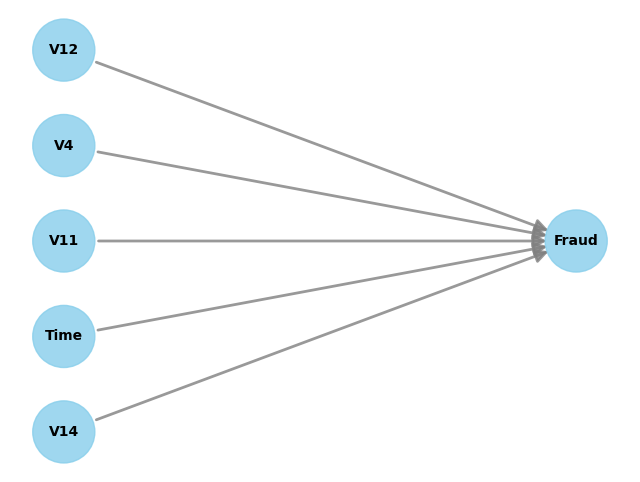

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
            d                       
──────────────────────────(E[Fraud])
d[Time  V₄  V₁₁  V₁₂  V₁₄]          
Estimand assumption 1, Unconfoundedness: If U→{Time,V4,V11,V12,V14} and U→Fraud then P(Fraud|Time,V4,V11,V12,V14,,U) = P(Fraud|Time,V4,V11,V12,V14,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Kausale Wirkung (Causal Effect): -0.012738203926484767


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_mode

Refute: Use a Placebo Treatment
Estimated effect:-0.012738203926484767
New effect:0.0
p value:1.0



/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [38]:
# Kausalität zwischen den Variablen untersuchen

%pip install dowhy

import dowhy
from dowhy import CausalModel
import numpy as np
import pandas as pd
import networkx as nx

# Definition des kausalen Modells
model = CausalModel(
    data=df,
    treatment=['Time', 'V4', 'V11', 'V12', 'V14'], # Variablen mit höheren Korrelation ausgewählt (und Time)
    outcome="Fraud",
    graph="""
        digraph {
            Time -> Fraud;
            V4 -> Fraud;
            V11 -> Fraud;
            V12 -> Fraud;
            V14 -> Fraud;
        }
    """
)

# Visualisierung des Kausalgraphen
model.view_model()

# Identifizieren der Kausalwirkung
identified_estimand = model.identify_effect()
print(identified_estimand)


# Schätzung der Kausalwirkung
causal_effect = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)

# Ergebnisse anzeigen
print("Kausale Wirkung (Causal Effect):", causal_effect.value)

# Validierung der Ergebnisse
refutation = model.refute_estimate(
    identified_estimand,
    causal_effect,
    method_name="placebo_treatment_refuter"
)
print(refutation)

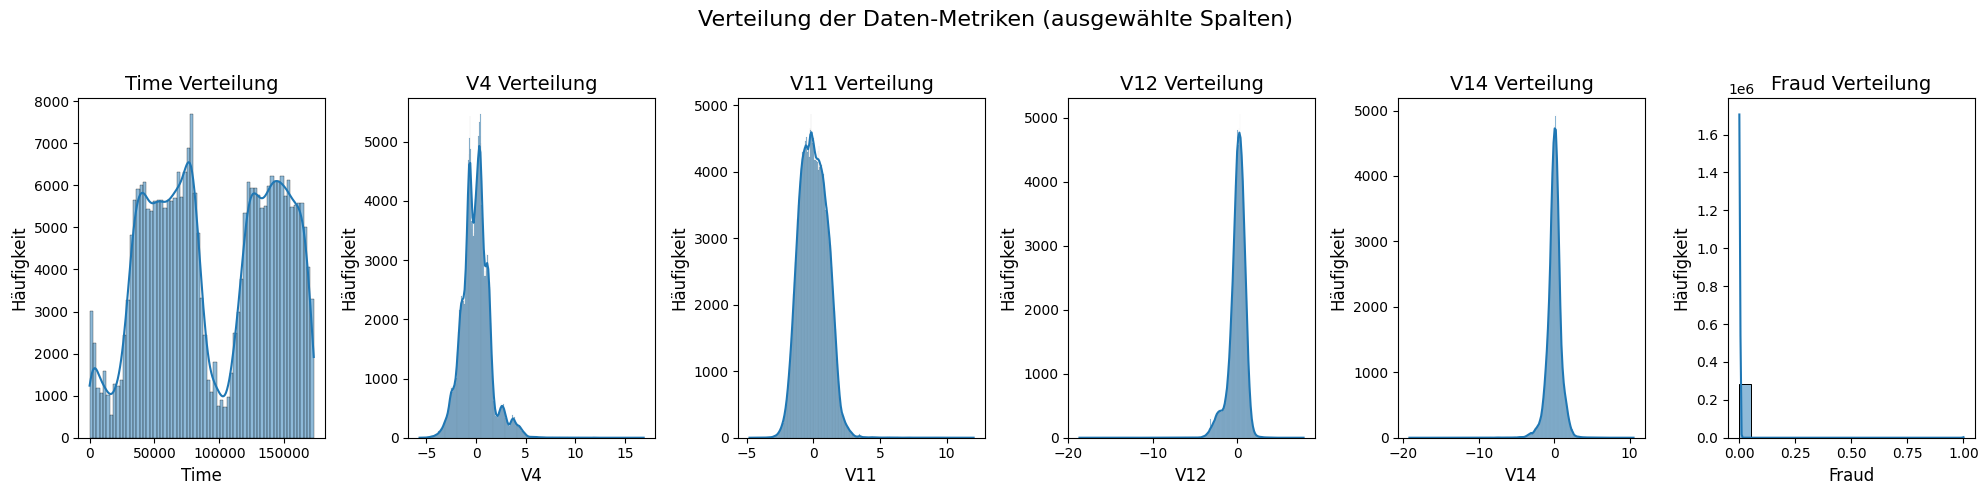

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Auswahl der Spalten
selected_columns = ['Time', 'V4', 'V11', 'V12', 'V14', 'Fraud'] # Variablen mit höhreren Korrelation zu Fraud ausgewählt (und Time aus Interesse)

# Erstellung eines Subplots mit 1 Zeile und der Anzahl der ausgewählten Spalten
fig, axes = plt.subplots(1, len(selected_columns), figsize=(20, 5))
fig.suptitle('Verteilung der Daten-Metriken (ausgewählte Spalten)', fontsize=16)

# Erstelle ein Verteilungsdiagramm für jede numerische Spalte
for idx, column in enumerate(selected_columns):
    sns.histplot(data=df, x=column, ax=axes[idx], kde=True)
    axes[idx].set_title(f'{column} Verteilung', fontsize=14)
    axes[idx].set_xlabel(column, fontsize=12)
    axes[idx].set_ylabel('Häufigkeit', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



## Key Findings:
Fehlende Werte (Missing Values) wurden bereits im Rahmen der Explorativen Datenanalyse (EDA) identifiziert und entsprechend behandelt.  

Korrelation nach Spearman ist die geeigneteste Berechnungsmethode für unseren Datensatz. Die Begründung ist weiter oben ersichtlich.
- Interpretation: allgemein eher schwache Korrelation zwischen Fraud und anderen Variablen
- Sehr niedrige Korrelationen (|ρ| < 0.05): Time (-0.012), V1 (-0.041), V2 (0.049), V5 (-0.028), V6 (-0.038), V7 (-0.047), V8 (0.023), V9 (-0.048), V10 (-0.058), V13 (-0.003), V15 (-0.002), V16 (-0.048), V17 (-0.042), V18 (-0.033), V19 (0.022), V20 (0.022), V22 (0.002), V23 (-0.006), V24 (-0.009), V25 (0.005), V26 (0.005), V27 (0.029), V28 (0.021), Amount (-0.008)
- Leicht höhere Korrelationen (|ρ| zwischen 0.05 und 0.1): V4 (0.062), V11 (0.059), V12 (-0.061), V14 (-0.063)


Outliers: Vorallem Spalte Amount besitzt Outliers, diese müssen jedoch nicht gelöscht werden, da es sich nicht um Fehler im Datenset handelt.

Verteilung im Datensatz (nur ausgewählte Variablen angeschaut): Die Variablen V4, V11, V12 und V14 zeigen alle eine symmetrische Verteilung mit starken Peaks um ihren jeweiligen Mittelwert.

Kausalität: Es besteht keine Beziehung zwischen den erklährenden Variablen untereinander, aber die erklährenden VariablenTime, V4, V11, V12 und V14 sind direkt mit Fraud verbunden.

## **Utility Functions for Model Training Evaluation

In [40]:
# Import necessary libraries for data processing, modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report,
                           roc_curve, auc)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

def prepare_data(df, target_column='Fraud', test_size=0.3, random_state=42):
    """
    Prepare and split data for modeling.

    Parameters:
    - df: Input DataFrame containing features and target variable
    - target_column: Name of the column containing the target variable (default: 'Fraud')
    - test_size: Proportion of dataset to include in the test split (default: 0.3)
    - random_state: Random seed for reproducibility (default: 42)

    Returns:
    - X_train, X_test: Training and test feature sets
    - y_train, y_test: Training and test target variables
    """
    # Separate features (X) from target variable (y)
    # We remove the target column as it's what we want to predict
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Split data into training and test sets
    # stratify=y ensures same proportion of samples for each class in both splits
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

def apply_smote(X_train, y_train, random_state=42):
    """
    Apply SMOTE (Synthetic Minority Over-sampling Technique) to handle class imbalance.
    Creates synthetic examples of the minority class to balance the dataset.

    Parameters:
    - X_train: Training features
    - y_train: Training target variable
    - random_state: Random seed for reproducibility (default: 42)

    Returns:
    - X_resampled, y_resampled: Balanced feature and target sets
    """
    smote = SMOTE(random_state=random_state)
    return smote.fit_resample(X_train, y_train)

def plot_model_performance(y_test, y_pred, y_pred_prob, model_name="Model"):
    """
    Create comprehensive visualization of model performance including ROC curve
    and key performance metrics.

    Parameters:
    - y_test: True target values
    - y_pred: Model's predicted values
    - y_pred_prob: Model's predicted probabilities
    - model_name: Name of the model for plot titles (default: "Model")
    """
    # Calculate all key performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate ROC curve components
    # FPR = False Positive Rate, TPR = True Positive Rate (Recall)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Create ROC curve plot
    plt.figure(figsize=(10, 6))
    # Plot the actual ROC curve
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC Curve (AUC = {roc_auc:.2f})')
    # Plot the random classifier line (baseline)
    plt.plot([0, 1], [0, 1], color='navy', lw=2,
             linestyle='--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Create performance metrics bar plot
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    values = [accuracy, precision, recall, f1]
    plt.figure(figsize=(8, 5))
    plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red'])
    plt.title(f'Key Metrics - {model_name}')
    plt.ylim(0, 1.1)  # Set y-axis limit for better visualization
    plt.ylabel('Score')

    # Add value labels on top of each bar
    for i, v in enumerate(values):
        plt.text(i, v + 0.03, f"{v:.2f}", ha='center', fontsize=12)
    plt.show()

    # Print detailed metrics
    print(f"\nKey Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")  # Proportion of correct predictions
    print(f"Precision: {precision:.2f}")  # True Positives / (True Positives + False Positives)
    print(f"Recall: {recall:.2f}")  # True Positives / (True Positives + False Negatives)
    print(f"F1-Score: {f1:.2f}")  # Harmonic mean of Precision and Recall

    # Classification report shows precision, recall, and F1-score for each class
    # ROC AUC Score measures the model's ability to distinguish between classes
def quick_evaluate_model(y_test, y_pred, y_pred_prob, model_name="Model"):
    """
    Prints a quick evaluation of model performance showing classification report
    and ROC AUC score.

    Parameters:
    - y_test: True target values
    - y_pred: Model predictions
    - y_pred_prob: Prediction probabilities
    - model_name: Name of the model for display (default: "Model")
    """
    print(f"{model_name} Results:")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

# **Logistic Regression Model**

In [41]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np

# Prepare the data for modeling
# Separate features (X) and target variable (y)
# We remove the Fraud column as it's what we want to predict
X_train, X_test, y_train, y_test = prepare_data(df)

# Apply SMOTE to handle class imbalance
# This creates synthetic examples of the minority class (fraud cases)
# to prevent the model from being biased towards the majority class
X_train_resampled, y_train_resampled = apply_smote(X_train, y_train)

# Initialize Logistic Regression Classifier
# Logistic Regression models probability of binary outcomes using a logistic function
# random_state ensures reproducibility of results
# max_iter increased to ensure convergence with complex datasets
lr_classifier = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)

# Train the model on the resampled data
# The model learns the optimal coefficients for each feature to predict fraud probability
lr_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
# Generate both class predictions (fraud/non-fraud) and probability scores
lr_pred = lr_classifier.predict(X_test)  # Binary predictions (0 or 1)
lr_pred_prob = lr_classifier.predict_proba(X_test)[:, 1]  # Probability scores for fraud class

#Quick evaluation
quick_evaluate_model(y_test, lr_pred, lr_pred_prob, "Logistic Regression")

Logistic Regression Results:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     84976
           1       0.15      0.80      0.25       142

    accuracy                           0.99     85118
   macro avg       0.57      0.90      0.62     85118
weighted avg       1.00      0.99      0.99     85118


ROC AUC Score: 0.9650525185570209


#Logistical Regression Performance

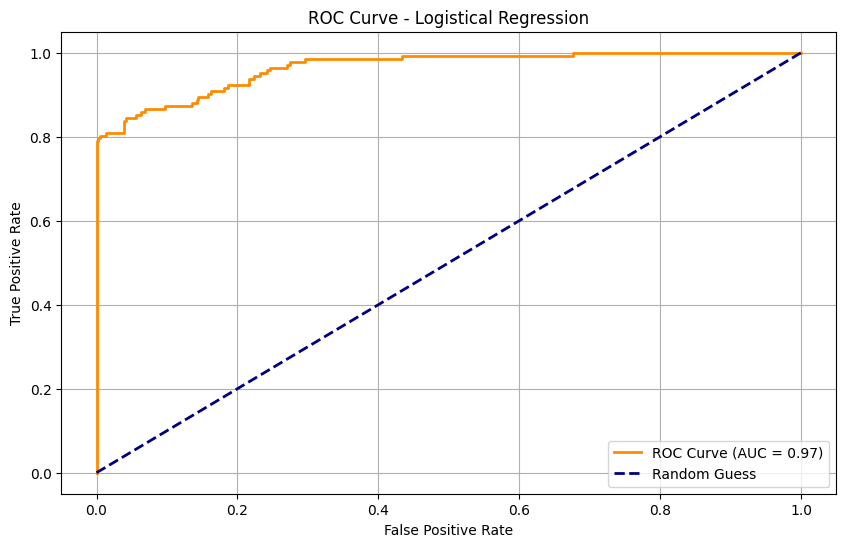

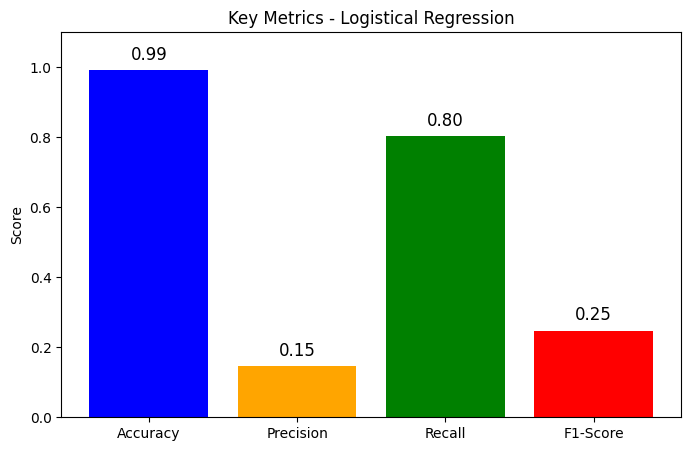


Key Metrics for Logistical Regression:
Accuracy: 0.99
Precision: 0.15
Recall: 0.80
F1-Score: 0.25


In [42]:

# Evaluate Logistical Regression performance using our utility function
# This will create ROC curve, metrics plot, and print all relevant metrics
plot_model_performance(y_test, lr_pred, lr_pred_prob, "Logistical Regression")


#XGBoost Model

In [43]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Prepare the data using utility function
X_train, X_test, y_train, y_test = prepare_data(df)

# Apply SMOTE using utility function
X_train_resampled, y_train_resampled = apply_smote(X_train, y_train)

# Initialize XGBoost Classifier with tuned hyperparameters
xgb_model = XGBClassifier(
    n_estimators=500,    # Number of gradient boosted trees
    learning_rate=0.1,   # Step size shrinkage to prevent overfitting
    max_depth=4,         # Maximum depth of each tree
    min_child_weight=3,  # Minimum sum of instance weight in a child
    subsample=0.7,       # Fraction of samples used for tree building
    colsample_bytree=0.7,# Fraction of features used for tree building
    gamma=1,             # Minimum loss reduction for split
    reg_alpha=2,         # L1 regularization on weights
    reg_lambda=2,        # L2 regularization on weights
    random_state=42      # For reproducibility
)

# Train model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

#Quick evaluation
quick_evaluate_model(y_test, y_pred, y_pred_prob, "XGBoost")


XGBoost Results:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.75      0.80      0.78       142

    accuracy                           1.00     85118
   macro avg       0.88      0.90      0.89     85118
weighted avg       1.00      1.00      1.00     85118


ROC AUC Score: 0.9679506027882604


# XGBoost Model Performance

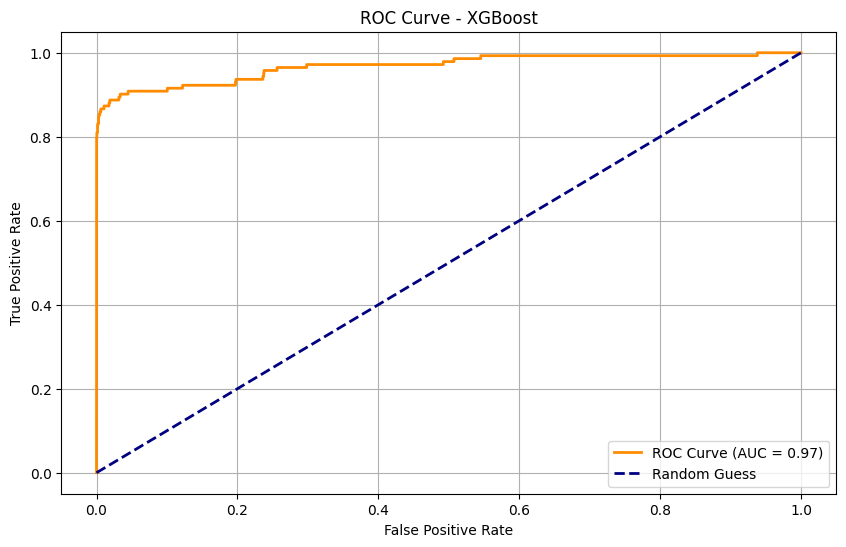

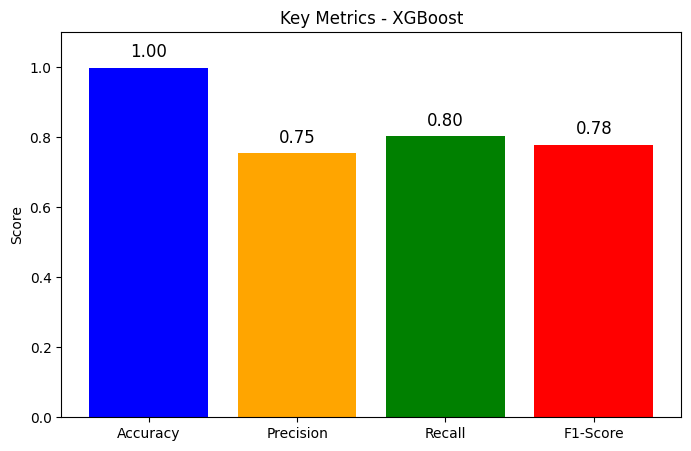


Key Metrics for XGBoost:
Accuracy: 1.00
Precision: 0.75
Recall: 0.80
F1-Score: 0.78


In [44]:
# Evaluate XGBoost performance using our utility function
# This will create ROC curve, metrics plot, and print all relevant metrics
plot_model_performance(y_test, y_pred, y_pred_prob, "XGBoost")


# Decision Tree Model

In [45]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np

# Prepare the data for modeling
# Separate features (X) and target variable (y)
# We remove the Fraud column as it's what we want to predict
X_train, X_test, y_train, y_test = prepare_data(df)

# Apply SMOTE to handle class imbalance
# This creates synthetic examples of the minority class (fraud cases)
# to prevent the model from being biased towards the majority class
X_train_resampled, y_train_resampled = apply_smote(X_train, y_train)

# Initialize Decision Tree Classifier
# Decision trees work by creating a tree of decision rules based on the features
# random_state ensures reproducibility of results
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the resampled data
# The model learns the patterns that distinguish fraud from non-fraud cases
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
# Generate both class predictions (fraud/non-fraud) and probability scores
dt_pred = dt_classifier.predict(X_test)  # Binary predictions (0 or 1)
dt_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]  # Probability scores for fraud class

#Quick evaluation
quick_evaluate_model(y_test, dt_pred, dt_pred_prob, "Decision Tree")


Decision Tree Results:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.44      0.74      0.55       142

    accuracy                           1.00     85118
   macro avg       0.72      0.87      0.77     85118
weighted avg       1.00      1.00      1.00     85118


ROC AUC Score: 0.8689180839130055


## Decision Tree Performance

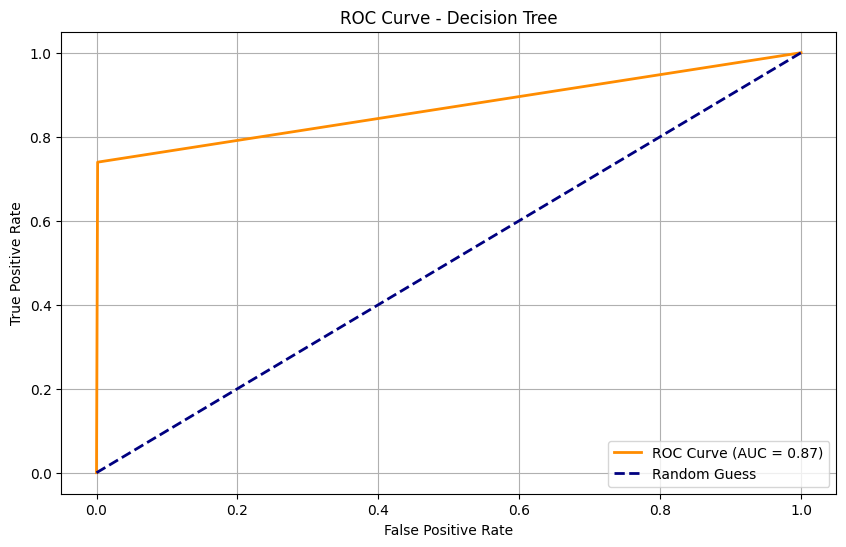

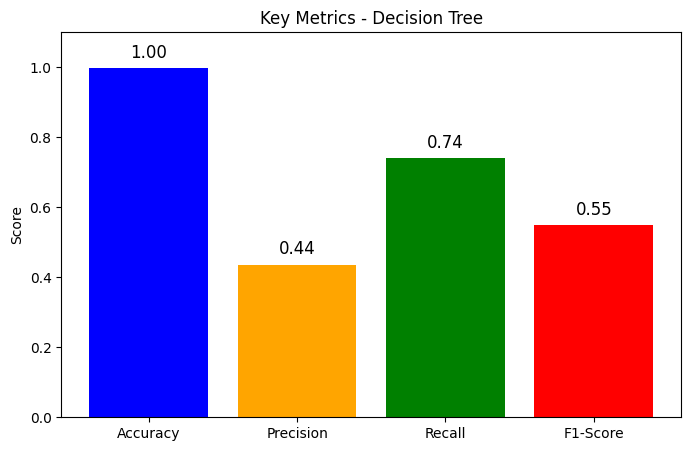


Key Metrics for Decision Tree:
Accuracy: 1.00
Precision: 0.44
Recall: 0.74
F1-Score: 0.55


In [46]:
# Evaluate Decision Tree performance using our utility function
# This will create ROC curve, metrics plot, and print all relevant metrics
plot_model_performance(y_test, dt_pred, dt_pred_prob, "Decision Tree")


# Random Forest Model

In [47]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np

# Prepare the data for modeling
# Separate features (X) and target variable (y)
# We remove the Fraud column as it's what we want to predict
X_train, X_test, y_train, y_test = prepare_data(df)

# Apply SMOTE to handle class imbalance
# This creates synthetic examples of the minority class (fraud cases)
# to prevent the model from being biased towards the majority class
X_train_resampled, y_train_resampled = apply_smote(X_train, y_train)

# Initialize Random Forest Classifier
# Random Forest is an ensemble method that creates multiple decision trees
# n_estimators=100: Create 100 different decision trees
# max_depth=5: Limit tree depth to prevent overfitting
# random_state: Ensure reproducibility of results
rf_classifier = RandomForestClassifier(
    random_state=42,
    n_estimators=100,  # Number of trees in the forest
    max_depth=5        # Maximum depth of each tree
)

# Train the Random Forest model
# Each tree in the forest will learn slightly different patterns
# The final prediction is an average of all tree predictions
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
# Generate both class predictions and probability scores
rf_pred = rf_classifier.predict(X_test)  # Binary predictions (0 or 1)
rf_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]  # Probability scores for fraud class

#Quick evaluation
quick_evaluate_model(y_test, rf_pred, rf_pred_prob, "Random Forest")


Random Forest Results:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.23      0.83      0.36       142

    accuracy                           0.99     85118
   macro avg       0.61      0.91      0.68     85118
weighted avg       1.00      0.99      1.00     85118


ROC AUC Score: 0.9702468186543475


## Random Forest Performance

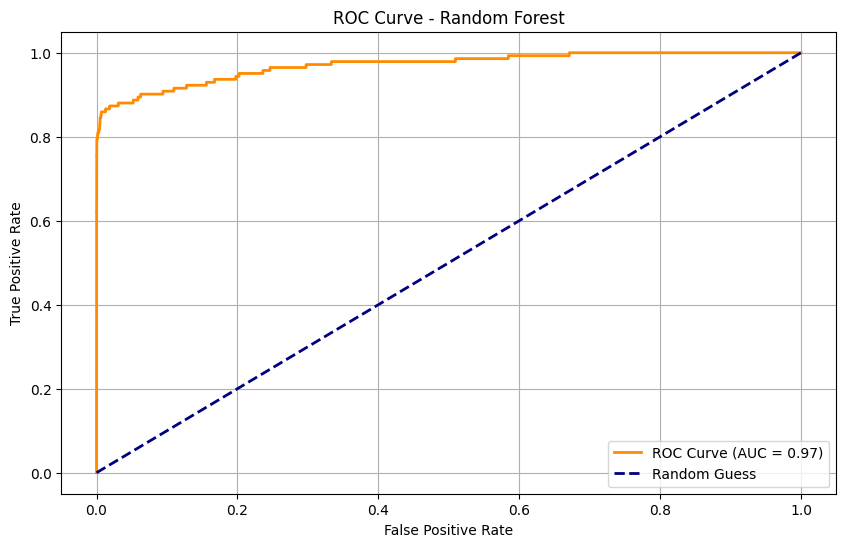

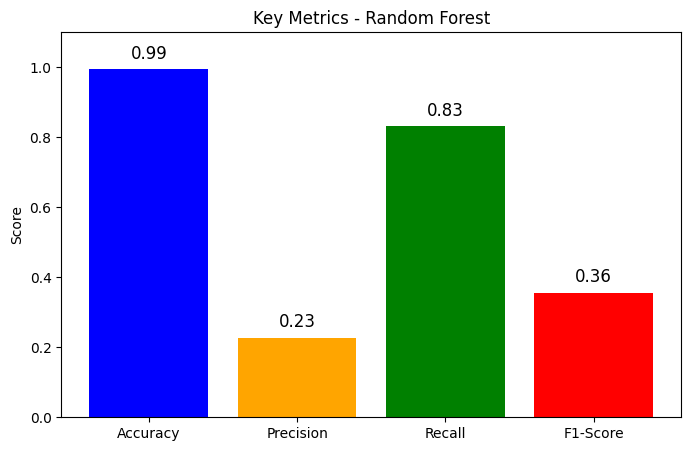


Key Metrics for Random Forest:
Accuracy: 0.99
Precision: 0.23
Recall: 0.83
F1-Score: 0.36


In [48]:
# Evaluate Random Forest performance using our utility function
# This will create ROC curve, metrics plot, and print all relevant metrics
plot_model_performance(y_test, rf_pred, rf_pred_prob, "Random Forest")